### 1. 
- Draw a linear regression line through the dataset dataset/w5-simple-regression-trainset.xlsx. 
- Please note: the excel file contains data only in Sheet1. Using Scikit-learn library allowed.


In [1]:
import pandas as pd

df = pd.read_excel('datasets/w5-multi-regression-trainset.xlsx')
df.head()

,x1,x2,x3,x4,y
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
# take out the x4 column because it is a different type
data_filtered = df[['x1','x2','x3','y']]
data_filtered.head()

,x1,x2,x3,y
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
# first shuffle the data
shuffled_data = data_filtered.sample(frac=1)
shuffled_data.head()

,x1,x2,x3,y
5,131876.90,99814.71,362861.36,156991.12
36,27892.92,84710.77,164470.71,77798.83
18,67532.53,105751.03,304768.73,108733.99
34,38558.51,82982.09,174999.30,81005.76
24,65605.48,153032.06,107138.38,101004.64


In [4]:
shuffled_data.shape

(45, 4)

In [5]:
# split the data into training and test set
n_training = shuffled_data.shape[0]//2
n_training

22

In [6]:
data_train = shuffled_data.iloc[0:n_training,:]
data_train.shape

(22, 4)

In [7]:
data_test = shuffled_data.iloc[n_training:,:]
data_test.shape

(23, 4)

In [8]:
data_train_x = data_train[['x2']].values.reshape(-1,1)
data_train_x.shape

(22, 1)

In [9]:
data_train_y = data_train[['y']].values.reshape(-1,1)
data_train_y.shape


(22, 1)

In [10]:
data_test_x = data_test[['x2']].values.reshape(-1,1)
data_test_y = data_test[['y']].values.reshape(-1,1)
print(data_test_x.shape)
print(data_test_y.shape)

(23, 1)
(23, 1)


In [11]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=data_train_x, y=data_train_y)

LinearRegression()

In [12]:
pred = model.predict(data_test_x)


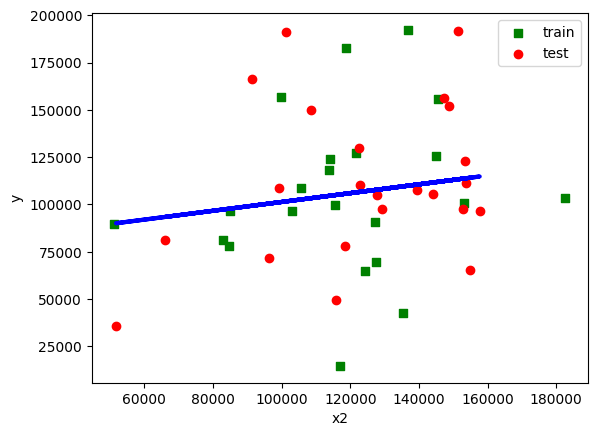

In [13]:
# Plot outputs
import matplotlib.pyplot as plt
plt_train = plt.scatter(data_train_x, data_train_y,  marker='s', color='green')
plt_test = plt.scatter(data_test_x, data_test_y,  marker='o', color='red')
plt.plot(data_test_x, pred, color='blue', linewidth=3)
plt.legend ((plt_train, plt_test), ('train', 'test'))
plt.xlabel ("x2")
plt.ylabel ("y")

plt.show()

In [14]:
model.coef_

array([[0.23320381]])

In [15]:
model.intercept_

array([78019.80899])

- Regression line equation: y = .215x + 83259.4

### 2.
- Draw polynomial regression lines of degree **2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100** through the dataset. 


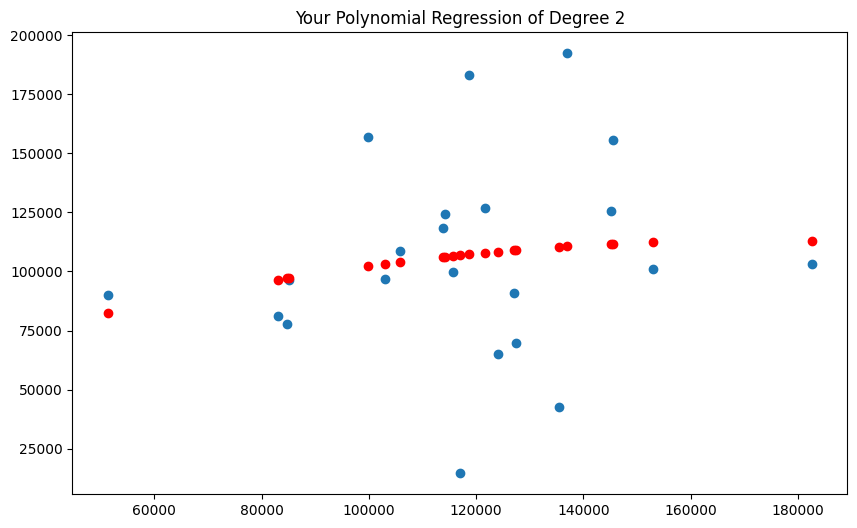

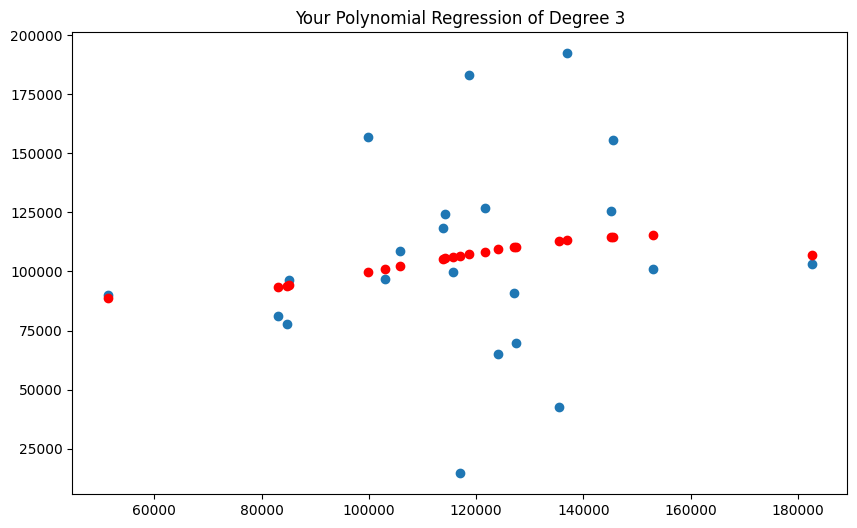

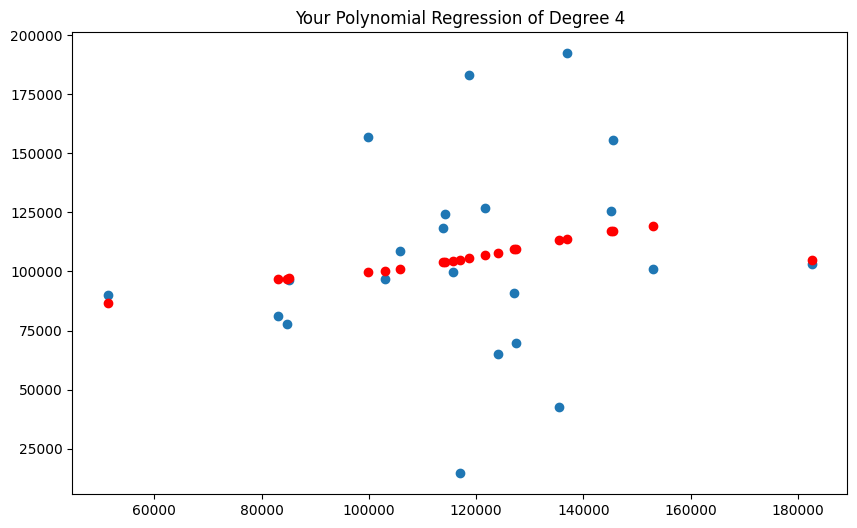

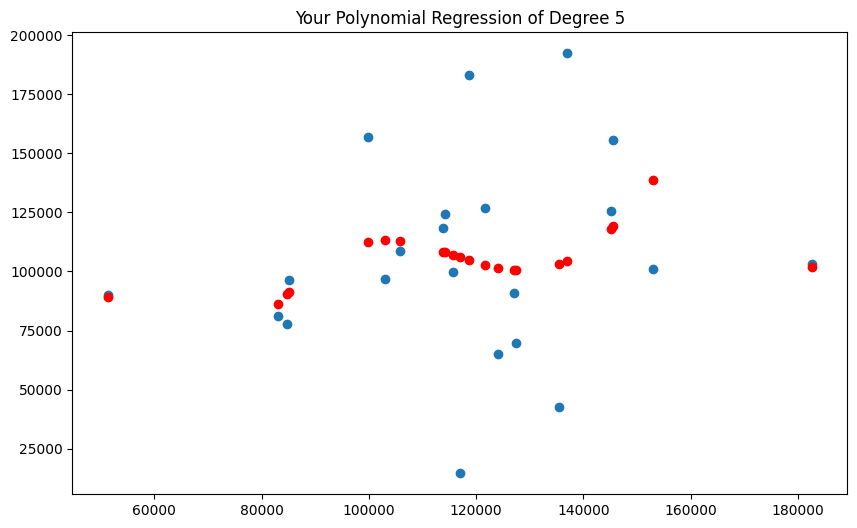

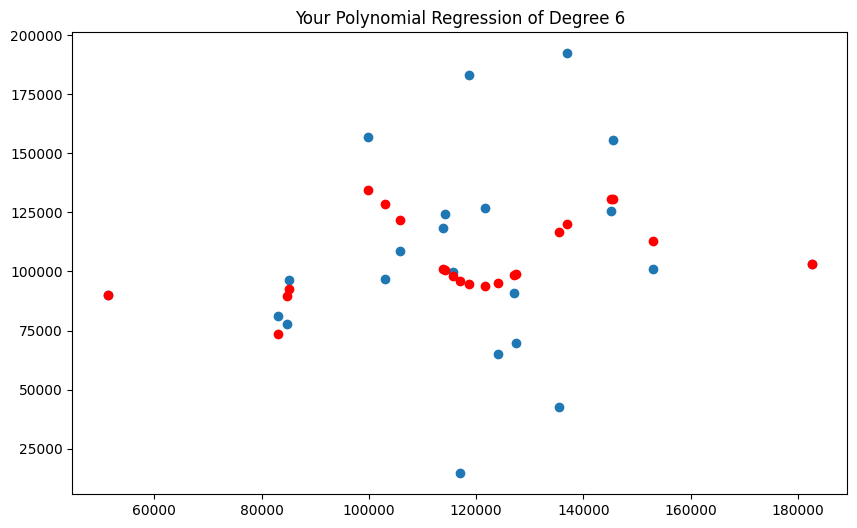

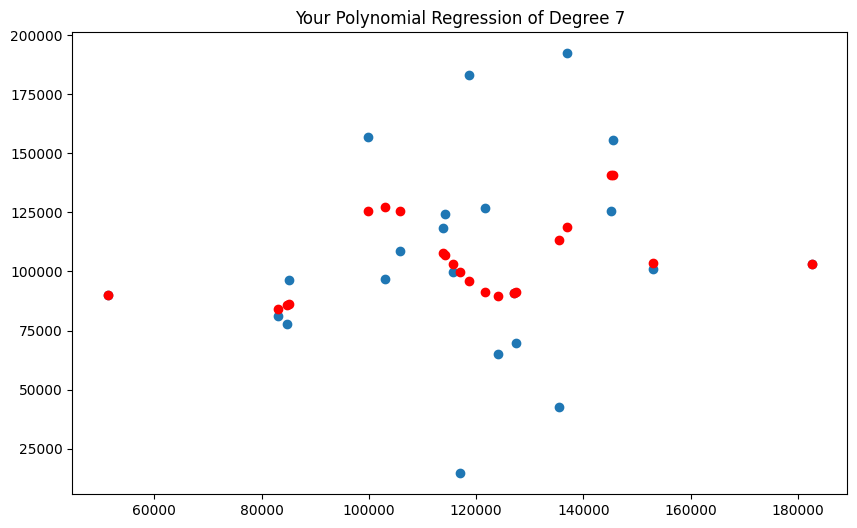

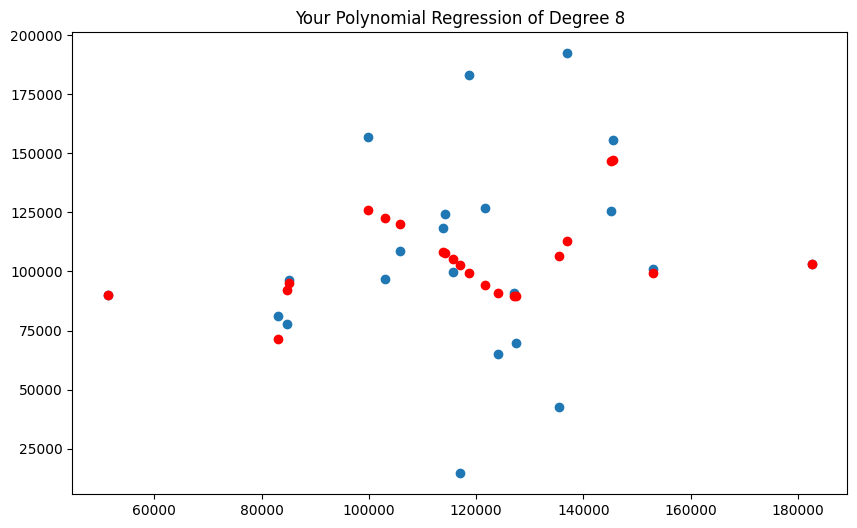

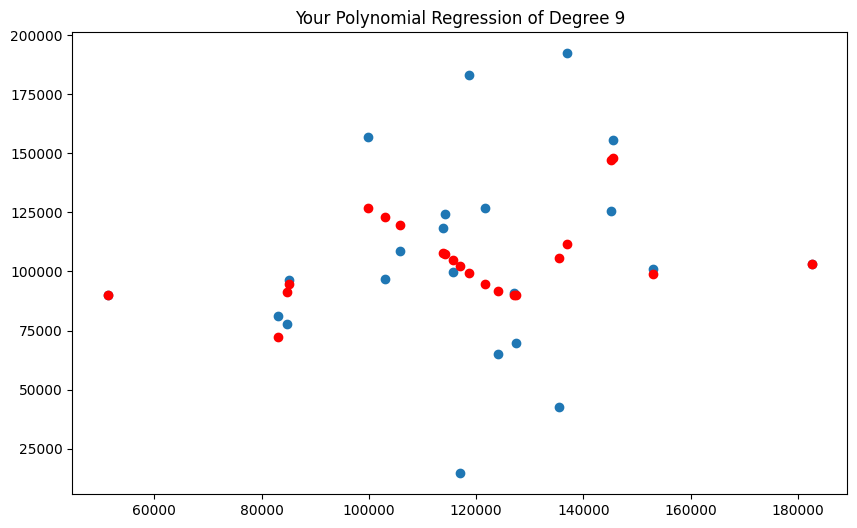

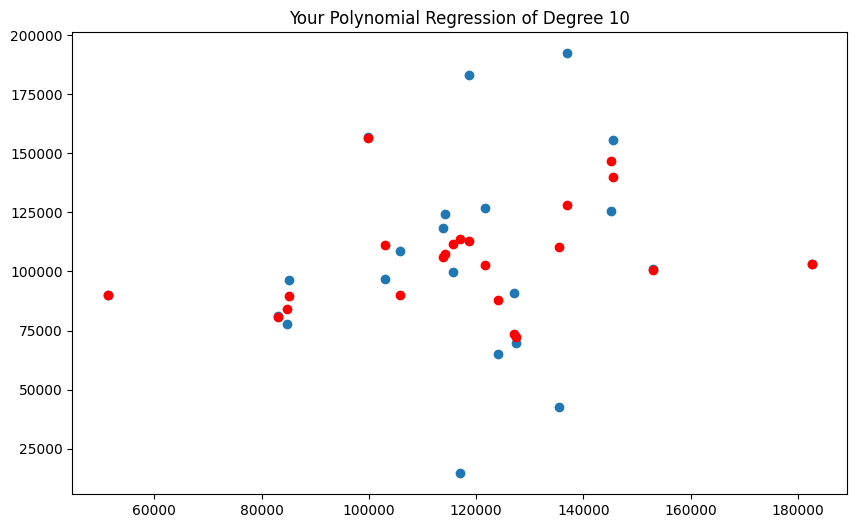

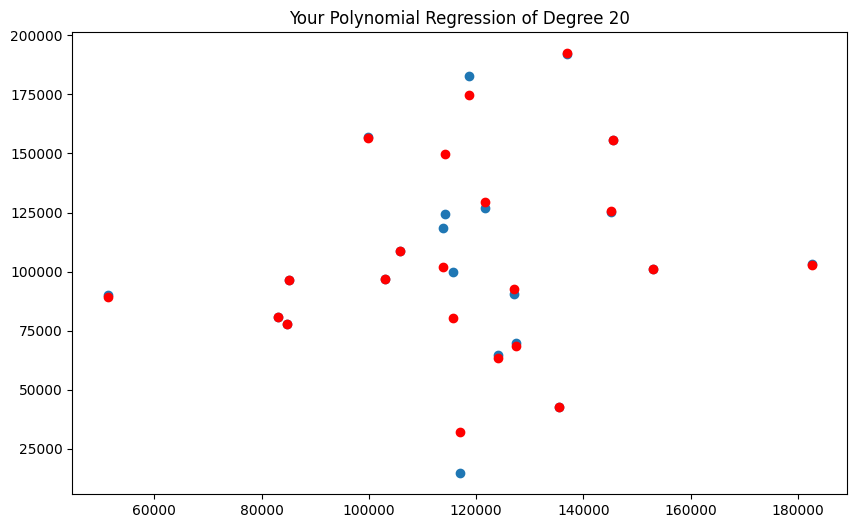

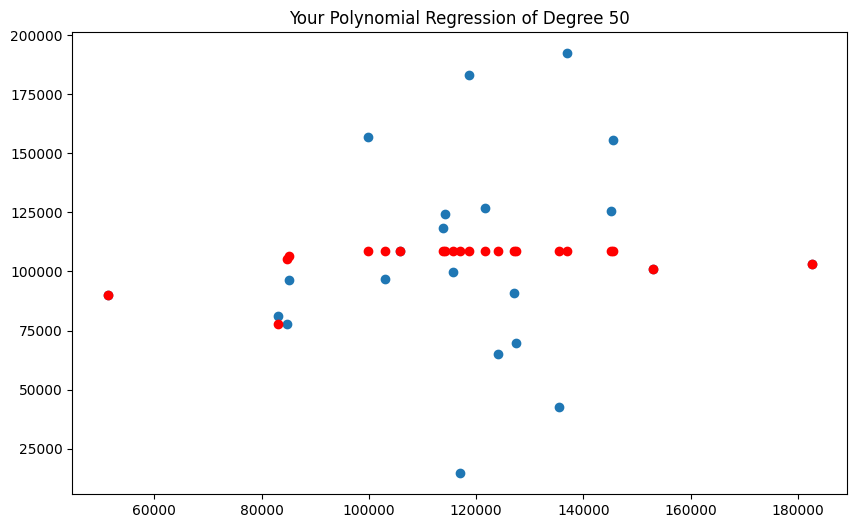

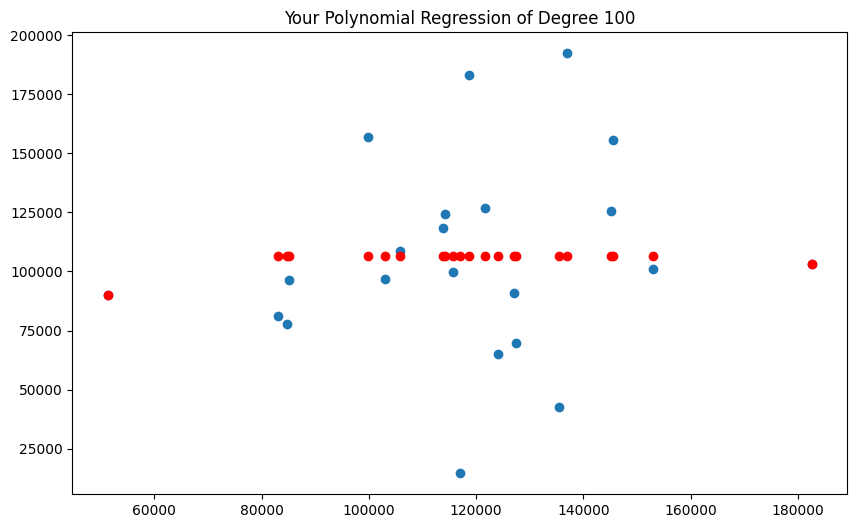

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_x = scaler.fit_transform(data_train_x)

degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]


for degree in degrees: 
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features_train = poly.fit_transform(scaled_train_x)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features_train, data_train_y)
    y_predicted = poly_reg_model.predict(poly_features_train)
    plt.figure(figsize=(10,6))
    plt.title(f"Your Polynomial Regression of Degree {degree}")
    plt.scatter(data_train_x,data_train_y)
    plt.scatter(data_train_x,y_predicted, c='red')
    plt.show()





- Evaluate each of the models (including the model in #1) on the test set **dataset/w5-simple-testset.xlsx** in terms of RMSE and R2-score. Comments? 
- Using scikit-learn library allowed.

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

print(f"RMSE for model 1 = {np.sqrt(mean_squared_error(data_test_y,pred))}")
print(f'R2 score for model 1= {r2_score(data_test_y,pred)}')

RMSE for model 1 = 39501.07686304056
R2 score for model 1= 0.04066988056236176


- The RMSE for model 1 is very bad, same for the R2 Score

In [50]:
df2 = pd.read_excel('datasets/w5-simple-regression-testset.xlsx')
df2.head()

,x,y
0,1.5,69.00
1,2.5,80.33
2,3.5,78.50
3,4.5,89.80
4,5.5,92.00


In [51]:
shuffled_data_2 = df2.sample(frac=1)
shuffled_data_2

,x,y
3,4.5,89.80
4,5.5,92.00
2,3.5,78.50
1,2.5,80.33
5,6.5,97.50
0,1.5,69.00


In [52]:
shuffled_data_2.shape

(6, 2)

In [53]:
n_training_2 = shuffled_data_2.shape[0]//2
n_training_2

3

In [54]:
data_train_2 = shuffled_data_2.iloc[0:n_training,:]
data_train_2.shape

(3, 2)

In [55]:
data_test_2 = shuffled_data_2.iloc[n_training_2:,:]
data_test_2.shape

(3, 2)

In [56]:
data_train_x2 = data_train_2[['x']].values.reshape(-1,1)
data_train_x2.shape

(3, 1)

In [57]:
data_train_y2 = data_train_2[['y']].values.reshape(-1,1)
data_train_y2.shape

(3, 1)

In [58]:
data_test_x2 = data_test_2[['x']].values.reshape(-1,1)
print(data_test_x2.shape)
data_test_y2 = data_test_2[['y']].values.reshape(-1,1)
print(data_test_y2.shape)

(3, 1)
(3, 1)


In [59]:
model2 = linear_model.LinearRegression()
model2.fit(X=data_train_x2, y=data_train_y2)


LinearRegression()

In [60]:
pred2 = model2.predict(data_test_x2)

In [61]:
print(f"RMSE for model 2 = {np.sqrt(mean_squared_error(data_test_y2,pred2))}")
print(f'R2 score for model 2= {r2_score(data_test_y2,pred2)}')

RMSE for model 2 = 4.608400542005385
R2 score for model 2= 0.8452874380842007


The RMSE and R2_score ALOT better than model 1 
- RMSE should be lower
- R2 Scores should be closer to 1